# Assignment (III)

---


##Please write your full name/names and student IDs here:




*   Full Name: Manvir Singh Cheema
*   Student ID: 218033894



---


#Question 1. (3 points)
* **For this question, please follow the steps outlined below:**
## Part (a):

* **Data Loading:** Read the lymph dataset from your mounted Google Drive using Pandas.

* **Data Splitting:** Split the dataset randomly into a 60% training set and a 40% test set using scikit-learn's train_test_split function.

* **Handling Categorical Data:** Encode categorical attributes with one-hot encoding using pandas.get_dummies, dropping the first attribute to avoid redundancy.

* **Decision Tree Classifier (1st Experiment):** Train a Decision Tree classifier in scikit-learn on the training data, setting the splitting criterion to "entropy," and requiring a minimum of 4 samples to split an internal node. Keep other settings unchanged.

* **Reproducibility:** Set the random_state to 32 in train_test_split and DecisionTreeClassifier to make your codes reproducible.

* **Performance Evaluation (1st Experiment):** Report the Decision Tree classifier's accuracy on the test data. Also, generate a high-resolution tree visualization (use plt.figure(figsize=(12, 8), dpi=300)).





In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


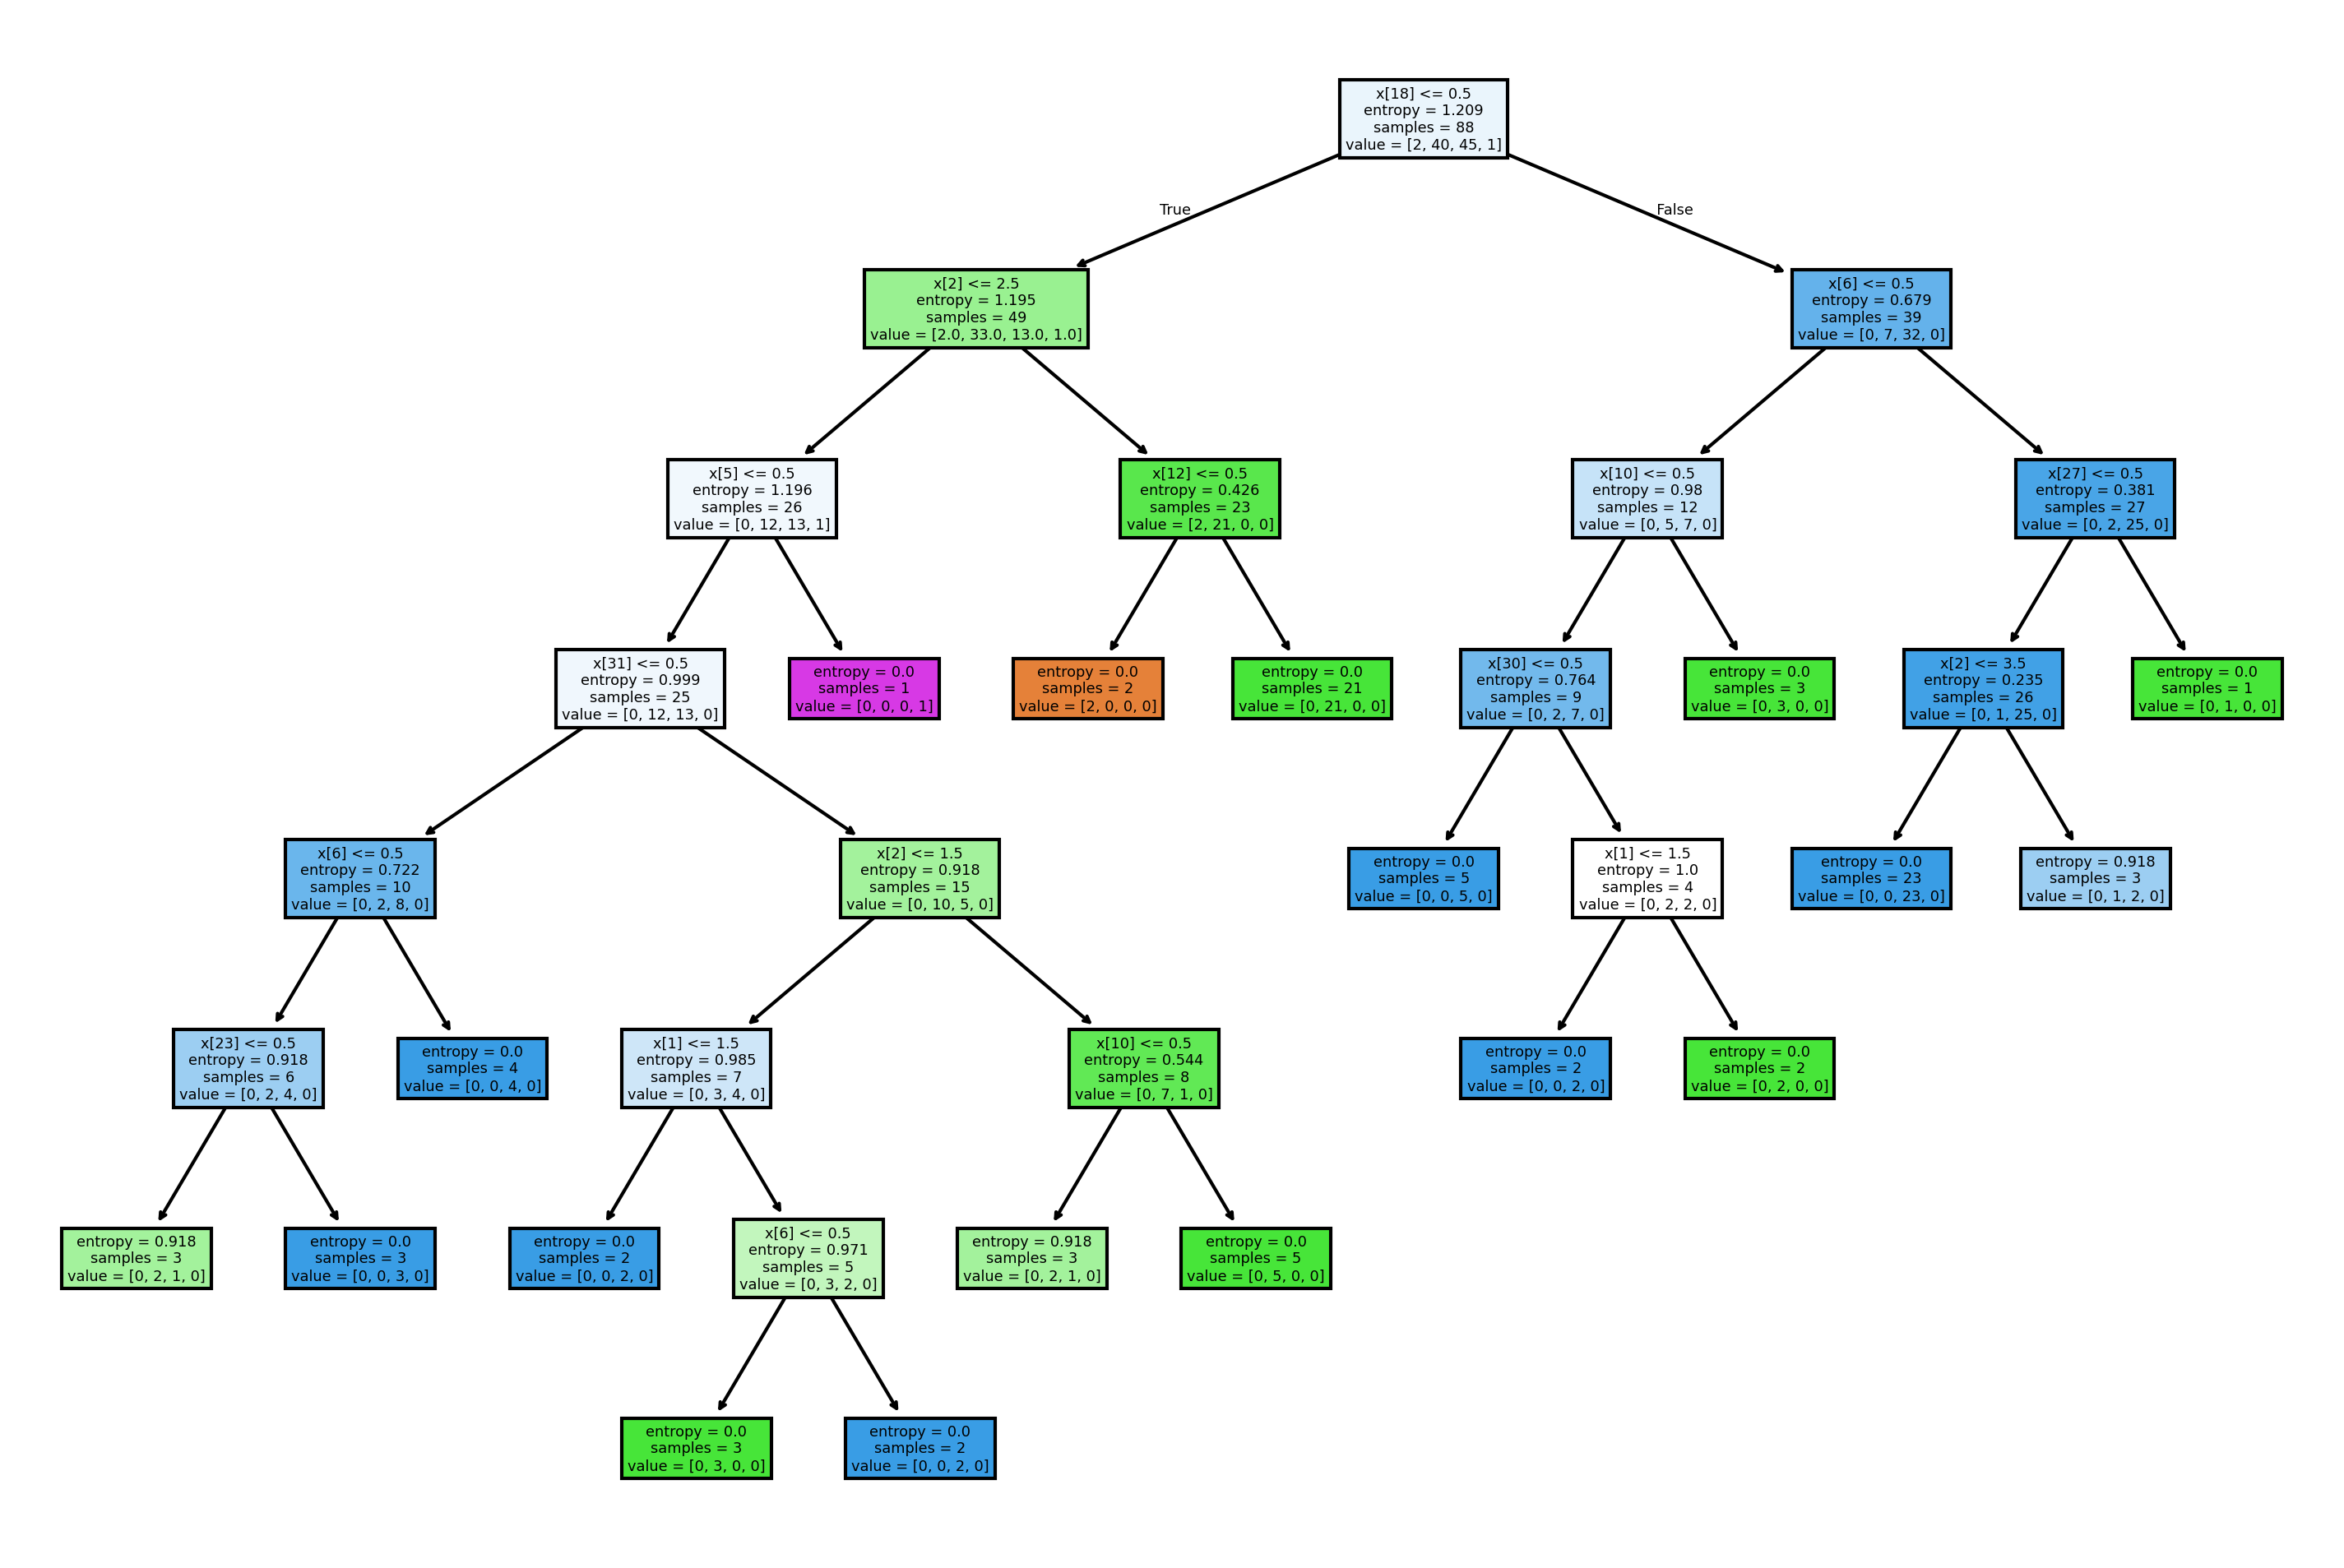

Decision Tree accuracy is: 0.8833333333333333


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
# from google.colab import drive
# drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/EECS4412/A3/lymph.csv")  # I changed it to make it to my directory

#.............................................................................
# write the rest here

# print(df)

# I will use last column as target
target_column = df.columns[-1]
ftrs = df.drop(columns=[target_column])
tgt = df[target_column]

# one-hot encode
ftrs_encoded = pd.get_dummies(ftrs, drop_first=True)

# split 60%train and rest test sets
ftrs_train, ftrs_test, tgt_train, tgt_test = train_test_split(ftrs_encoded, tgt, test_size=0.4, random_state=32)

# decision tree classifier
x = DecisionTreeClassifier(criterion='entropy', min_samples_split=4, random_state=32)
# fitting/building tree
x.fit(ftrs_train, tgt_train)

# Prediction and Accuracy
tgt_pred = x.predict(ftrs_test)
accuracy = accuracy_score(tgt_test, tgt_pred)


# visualizng
plt.figure(figsize=(12, 8), dpi=300)
plot_tree(x, filled=True)
plt.show()
print(f"Decision Tree accuracy is: {accuracy}")


#.............................................................................


## Part (b):


Modify the minimum samples required for splitting to 32 and re-run the experiment. Report the accuracy of the Decision Tree classifier with the modified parameter and create a visualization of the tree. Discuss the differences between the two Decision Trees and their respective results, highlighting how changing the minimum samples for splitting affects the tree structure and performance.


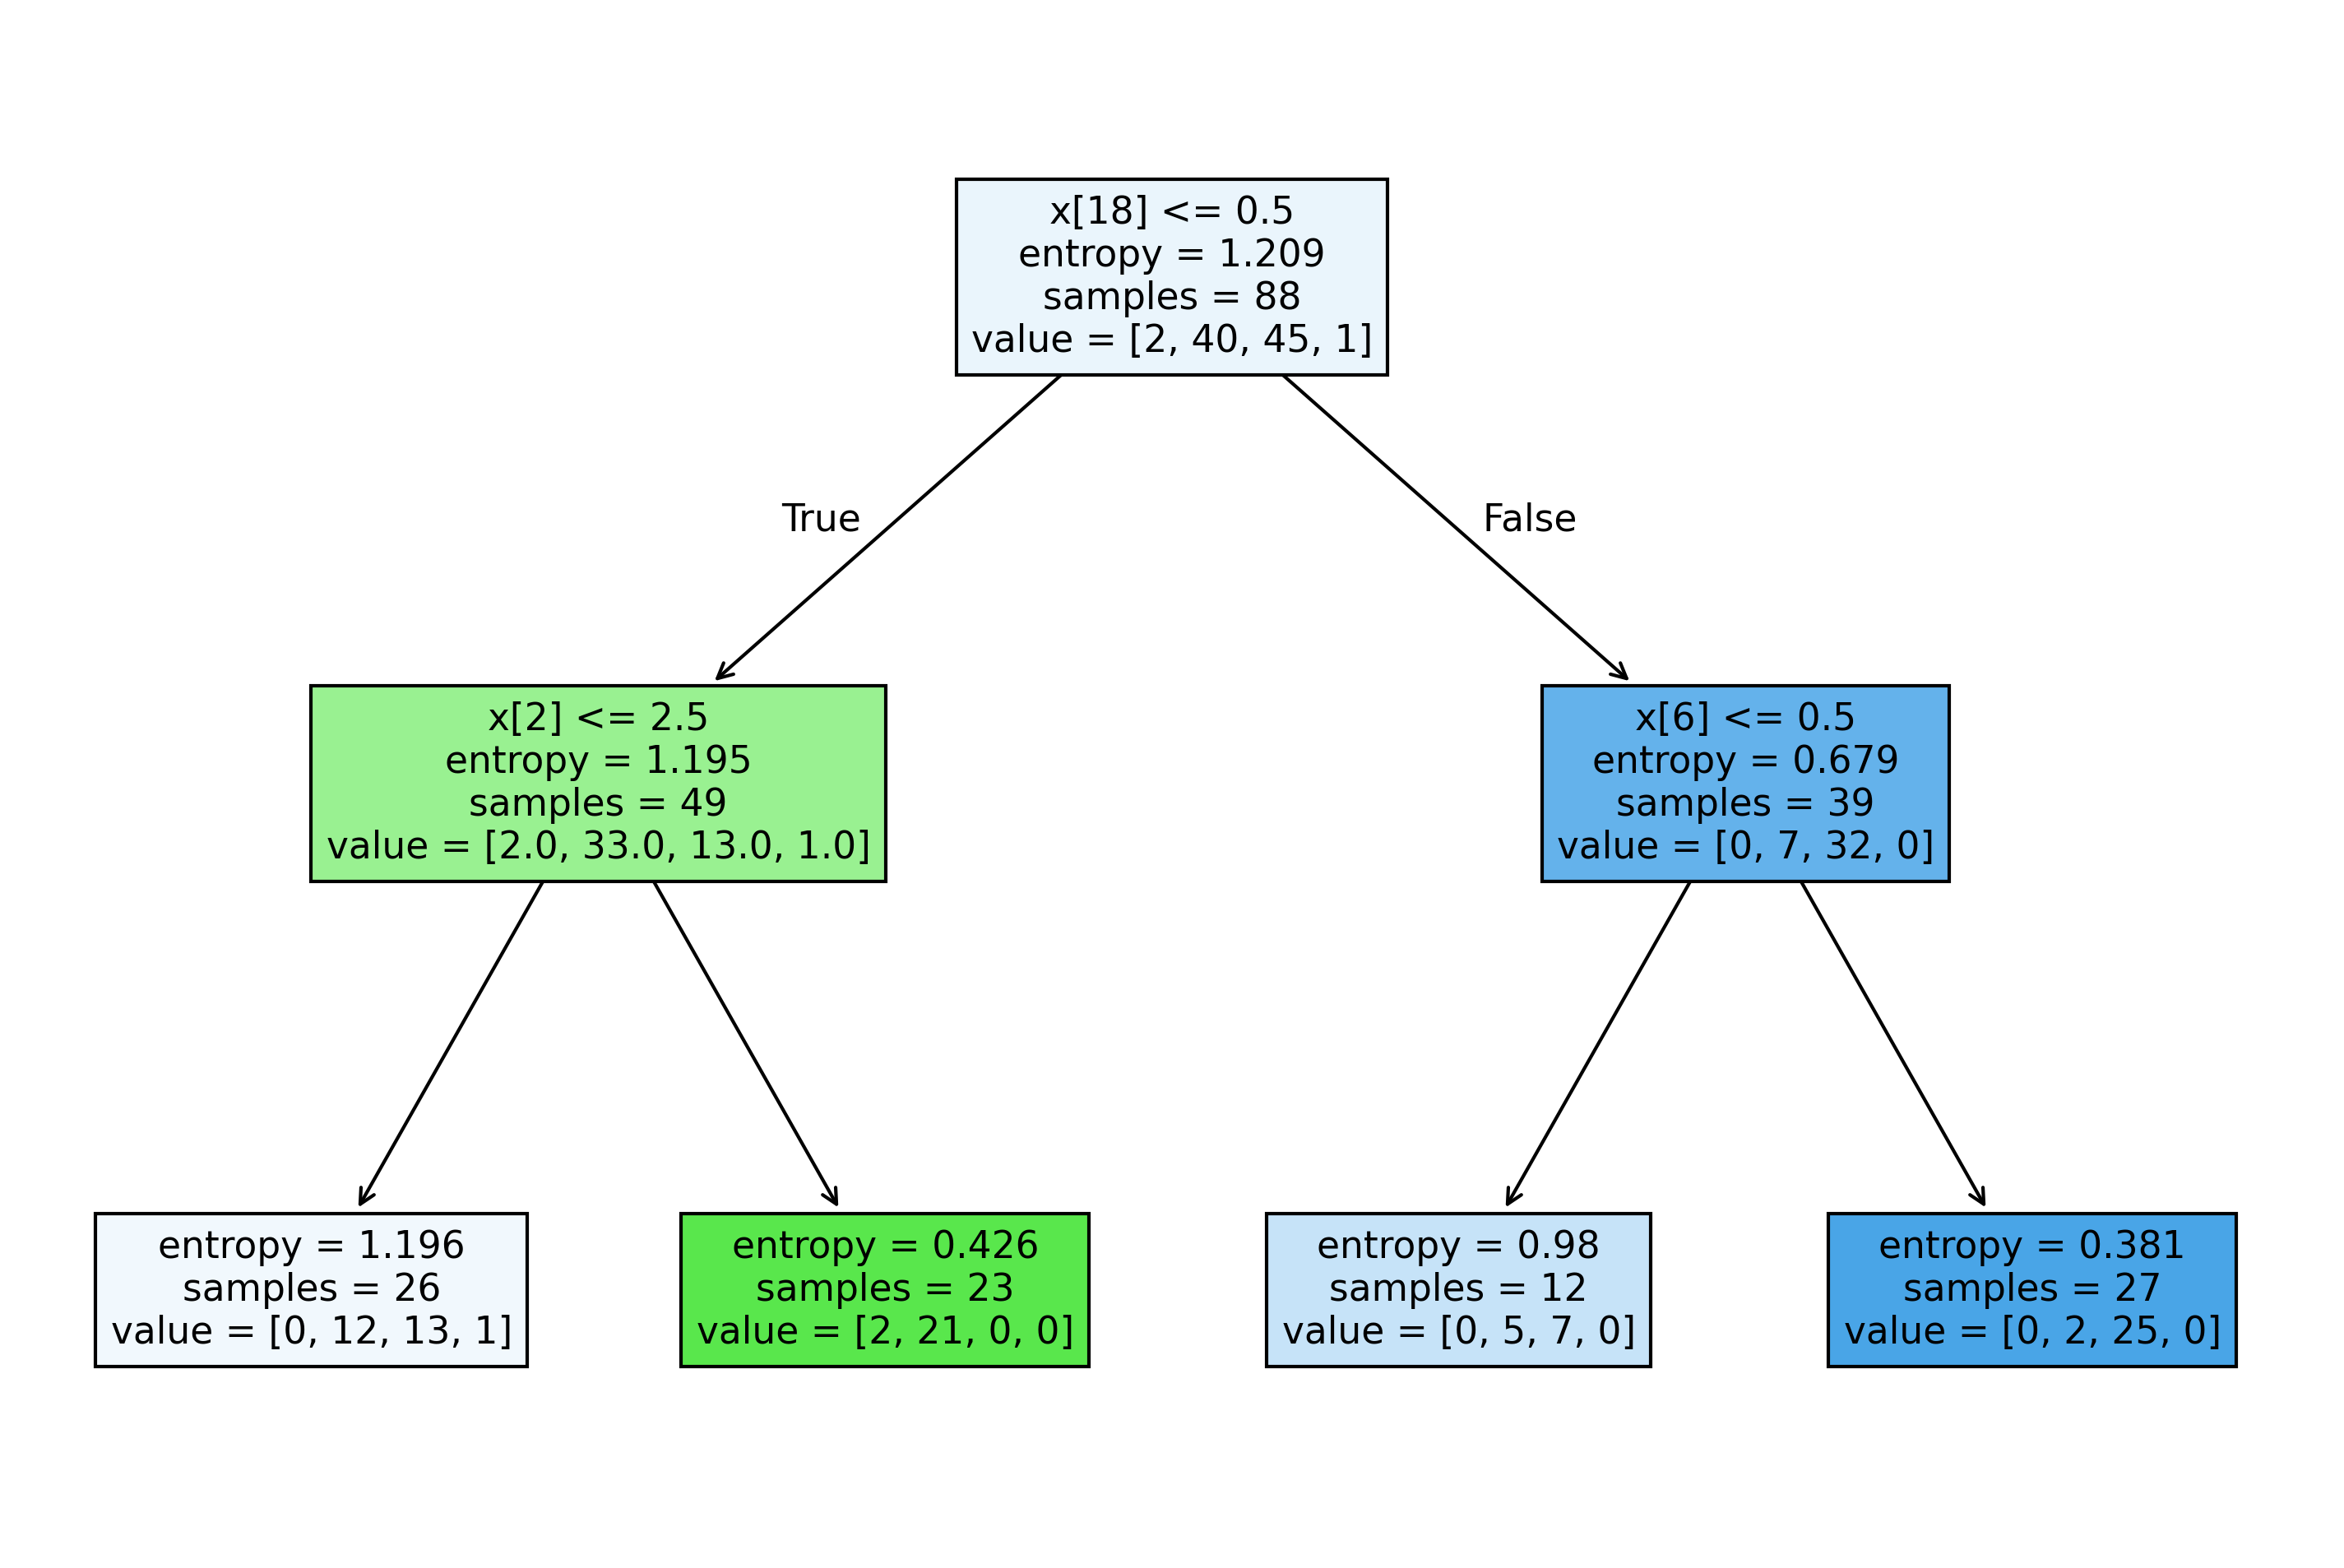

Decision Tree accuracy is: 0.7666666666666667


In [3]:

#.............................................................................
# write the rest here

xx = DecisionTreeClassifier(criterion='entropy', min_samples_split=32, random_state=32)
xx.fit(ftrs_train, tgt_train)

# prediction and Accuracy
tgt_pred = xx.predict(ftrs_test)
accuracy = accuracy_score(tgt_test, tgt_pred)


# visualizng
plt.figure(figsize=(12, 8), dpi=300)
plot_tree(xx, filled=True)
plt.show()
print(f"Decision Tree accuracy is: {accuracy}")




#.............................................................................




---


**Put your discussion here**


Discussion: The differences between the two Decision Trees is that the first tree has min_samples_split = 4 while the second Decision Tree has this values set to 32. When the value is set to 4, it grows deeper/complex and fits train data better since it only needs 4 samples to split and hence greater chance of creating more divisions as it aims to fit data. Although this comes at the risk of over fitting the training data which proves un-effective in real/test environments. On the other hand when it is set to 32, the result is shallower and fewwer splits. The tree does not make important splits as it does not need to under tthe condition and hence underfits the data which reduces overall accuracy. When min_samples_split is set to 32, the tree is easier to understand and faster to trace as compared to when it is set to 4.






---


# Question 2. (5 points)
##Part (a):
*  Write a Python function named "preprocess" that preprocesses and prepares
datasets for machine learning. It must take a training dataset and an optional test dataset as input. The code must first identify categorical and numerical attributes, then handle missing values by imputing the mean for numerical attributes and the most frequent value for categorical attributes. It is worth noting that to determine if an attribute is numerical, the process should involve checking its data type and potentially examining the number of unique values. This is necessary because an attribute may appear to have an "object" data type but could, in fact, be numerical in nature.

*  Subsequently, the "preprocess" code must standardize the numerical attributes by removing the mean and scaling to unit variance., and encodes categorical attributes using one-hot encoding.

*  If a test dataset is provided, it must undergo the same preprocessing steps, ensuring that the imputation for missing values and data scaling are performed based on the values obtained from the training dataset, thus maintaining consistency between the two datasets.

*  At the end, the function must return the preprocessed training and test datasets as (X_train, y_train, X_test, y_test) tuple if the test dataset exists. Otherwise it must return (X_train, y_train). X stands for independent processed attributes, while y indicates the class attribute.

In [4]:
from logging import exception
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
def preprocess(train_df, test_df=None):
  #.............................................................................
  # write your codes here

  # features and target of train
  if train_df is not None:
    target_column = train_df.columns[-1]
    X_train = train_df.drop(columns=[target_column]).copy()
    y_train = train_df[target_column].copy()
  else:
    exception("train_df is None")

  # checking test df, features and target
  if test_df is not None:
    target_column_test = test_df.columns[-1]
    X_test = test_df.drop(columns=[target_column_test]).copy()
    y_test = test_df[target_column_test].copy()

  # get numeric and categoric
  numeric_c, categoric_c = [], []
  for col in X_train.columns:
    # check if the column is number or not
    if np.issubdtype(X_train[col].dtype, np.number):
      numeric_c.append(col)
    else:
      # to see if value is numeric
      temp = pd.to_numeric(X_train[col], errors='coerce')
      conv_ratio = temp.notna().sum() / len(temp)
      unique_count = X_train[col].nunique()
      # if 90% of the values can be converted to numeric or the column has many unique values then make column numerical
      if conv_ratio >= 0.9 or unique_count > 20:
          numeric_c.append(col)
          X_train[col] = temp
          if test_df is not None:
              X_test[col] = pd.to_numeric(X_test[col], errors='coerce')
      else:
          categoric_c.append(col)

  # impute missing vals for numerical and categoric
  imputer_num = SimpleImputer(strategy='mean') #numeric
  imputer_cat = SimpleImputer(strategy='most_frequent') #categoric

  X_train_num = pd.DataFrame(imputer_num.fit_transform(X_train[numeric_c]), columns=numeric_c, index=X_train.index)
  if categoric_c: #categoric check
      X_train_cat = pd.DataFrame(imputer_cat.fit_transform(X_train[categoric_c]), columns=categoric_c, index=X_train.index)
  else:
      X_train_cat = pd.DataFrame(index=X_train.index)

  if test_df is not None:
    X_test_num = pd.DataFrame(imputer_num.transform(X_test[numeric_c]), columns=numeric_c, index=X_test.index)
    if categoric_c: #categoric check
        X_test_cat = pd.DataFrame(imputer_cat.transform(X_test[categoric_c]), columns=categoric_c, index=X_test.index)
    else:
        X_test_cat = pd.DataFrame(index=X_test.index)

  # standardize numeric atribute
  scaler = StandardScaler()
  X_train_num_scaler = pd.DataFrame(scaler.fit_transform(X_train_num), columns=numeric_c, index=X_train.index)
  if test_df is not None:
    X_test_num_scaler = pd.DataFrame(scaler.transform(X_test_num), columns=numeric_c, index=X_test.index)

  # one hot encode, check for categorical and skip  if none
  if X_train_cat.shape[1] > 0:
      X_train_cat_encode = pd.get_dummies(X_train_cat, drop_first=True)
  else:
      X_train_cat_encode = X_train_cat
  if test_df is not None:
      if X_test_cat.shape[1] > 0:
          X_test_cat_encode = pd.get_dummies(X_test_cat, drop_first=True)
      else:
          X_test_cat_encode = X_test_cat
      # align
      X_train_cat_encode, X_test_cat_encode = X_train_cat_encode.align(X_test_cat_encode, join='left', axis=1, fill_value=0)

  # finally  after processed numerical and catgorical data, I merge them
  X_train = pd.concat([X_train_num_scaler, X_train_cat_encode], axis=1)
  if test_df is not None:
    X_test = pd.concat([X_test_num_scaler, X_test_cat_encode], axis=1)


  #.............................................................................
  if test_df is not None:
      return X_train, y_train, X_test, y_test
  else:
      # If no test dataset is provided, return only the preprocessed training dataset
      return X_train, y_train


## Part (b)
In this task, your objective is to assess the performance of various machine learning classifiers for a credit classification problem. To ensure result reproducibility, set the random_state to 42 in KFold, Decision Tree, MLP Neural Network, and Random Forest. For the MLP, configure two hidden layers with 100 and 50 hidden units, respectively, and set max_iter to 1000. For the Random Forest, set the number of trees in the forest to 100. Finally, report the accuracy achieved on the test dataset.

In [5]:
# import necessary libraries
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Load the training and test datasets
credit_train = pd.read_csv("/content/drive/MyDrive/EECS4412/A3/credit-a-train.csv")
credit_test = pd.read_csv("/content/drive/MyDrive/EECS4412/A3/credit-a-test.csv")

# Preprocess the datasets and split them into features (X) and target (y)
X_train, y_train, X_test, y_test = preprocess(credit_train, credit_test)
  #.............................................................................
  # write your codes here

# print("X_train is:", X_train)
# print("y_train is:", y_train)
# print("X_test is:", X_test)
# print("y_test is:", y_test)

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# decision tree
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree_scores = cross_val_score(decision_tree, X_train, y_train, cv=kfold)
decision_tree.fit(X_train, y_train)
decision_tree_accuracy = accuracy_score(y_test, decision_tree.predict(X_test))
print("Decision Tree Accuracy:", decision_tree_accuracy)
decision_tree_scores_acc = np.mean(decision_tree_scores)
print("Decision Tree Cross Validation Accuracy:", decision_tree_scores_acc)

# k nearest neighbor k=1
k_nearest_1 = KNeighborsClassifier(n_neighbors=1)
k_nearest_1_scores = cross_val_score(k_nearest_1, X_train, y_train, cv=kfold)
k_nearest_1.fit(X_train, y_train)
k_nearest_1_accuracy = accuracy_score(y_test, k_nearest_1.predict(X_test))
print("K-Nearest Neighbors (k=1) Accuracy:", k_nearest_1_accuracy)
k_nearest_1_scores_acc = np.mean(k_nearest_1_scores)
print("K-Nearest Neighbors (k=1) Cross Validation Accuracy:", k_nearest_1_scores_acc)

# k nerest neighbor k=3
k_nearest_3 = KNeighborsClassifier(n_neighbors=3)
k_nearest_3_scores = cross_val_score(k_nearest_3, X_train, y_train, cv=kfold)
k_nearest_3.fit(X_train, y_train)
k_nearest_3_accuracy = accuracy_score(y_test, k_nearest_3.predict(X_test))
print("K-Nearest Neighbors (k=3) Accuracy:", k_nearest_1_accuracy)
k_nearest_3_scores_acc = np.mean(k_nearest_3_scores)
print("K-Nearest Neighbors (k=3) Cross Validation Accuracy:", k_nearest_3_scores_acc)

# Gaussiane naive bayes
gaussian_naive_bayes = GaussianNB()
gaussian_naive_bayes_scores = cross_val_score(gaussian_naive_bayes, X_train, y_train, cv=kfold)
gaussian_naive_bayes.fit(X_train, y_train)
gaussian_naive_bayes_accuracy = accuracy_score(y_test, gaussian_naive_bayes.predict(X_test))
print("Gaussian Naive Bayes Accuracy:", gaussian_naive_bayes_accuracy)
gaussian_naive_bayes_scores_acc = np.mean(gaussian_naive_bayes_scores)
print("Gaussian Naive Bayes Cross Validation Accuracy:", gaussian_naive_bayes_scores_acc)

# logistic regression
logistic_regression = LogisticRegression(max_iter=1000, random_state=42)
logistic_regression_scores = cross_val_score(logistic_regression, X_train, y_train, cv=kfold)
logistic_regression.fit(X_train, y_train)
logistic_regression_accuracy = accuracy_score(y_test, logistic_regression.predict(X_test))
print("Logistic Regression Accuracy:", logistic_regression_accuracy)
logistic_regression_scores_acc = np.mean(logistic_regression_scores)
print("Logistic Regression Cross Validation Accuracy:", logistic_regression_scores_acc)

# mlp neural netwrok
mlp_neural_network = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
mlp_neural_network_scores = cross_val_score(mlp_neural_network, X_train, y_train, cv=kfold)
mlp_neural_network.fit(X_train, y_train)
mlp_neural_network_accuracy = accuracy_score(y_test, mlp_neural_network.predict(X_test))
print("MLP Neural Network Accuracy:", mlp_neural_network_accuracy)
mlp_neural_network_scores_acc = np.mean(mlp_neural_network_scores)
print("MLP Neural Network Cross Validation Accuracy:", mlp_neural_network_scores_acc)

# random forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_scores = cross_val_score(random_forest, X_train, y_train, cv=kfold)
random_forest.fit(X_train, y_train)
random_forest_accuracy = accuracy_score(y_test, random_forest.predict(X_test))
print("Random Forest Accuracy:", random_forest_accuracy)
random_forest_scores_acc = np.mean(random_forest_scores)
print("Random Forest Cross Validation Accuracy:", random_forest_scores_acc)


  #.............................................................................

Decision Tree Accuracy: 0.8188405797101449
Decision Tree Cross Validation Accuracy: 0.7913636363636364
K-Nearest Neighbors (k=1) Accuracy: 0.7753623188405797
K-Nearest Neighbors (k=1) Cross Validation Accuracy: 0.7607142857142857
K-Nearest Neighbors (k=3) Accuracy: 0.7753623188405797
K-Nearest Neighbors (k=3) Cross Validation Accuracy: 0.7788636363636364
Gaussian Naive Bayes Accuracy: 0.7608695652173914
Gaussian Naive Bayes Cross Validation Accuracy: 0.7121103896103895
Logistic Regression Accuracy: 0.8623188405797102
Logistic Regression Cross Validation Accuracy: 0.8621103896103894
MLP Neural Network Accuracy: 0.8840579710144928
MLP Neural Network Cross Validation Accuracy: 0.8207142857142857
Random Forest Accuracy: 0.8768115942028986
Random Forest Cross Validation Accuracy: 0.8712012987012987




---


**Put your discussion here**


According to results above, MLP Neural network had the highest test accuracy with highest accuracy and random forest a close second. The method with the lowest disparity in tests was logistic regression and knn k=3 and random forest.




---


# Question 3. (4 points)
## Part (a)
 Use the ionosphere dataset and Run a 10-fold cross validation to evaluate classification error rate of each algorithm. Use the preprocessing function you have written in question 2. Similar to the previous question, set the random_state to 42 in KFold, Decision Tree, MLP Neural Network, and Random Forest. For the MLP, configure two hidden layers with 100 and 50 hidden units, respectively, and set max_iter to 1000. For the Random Forest, set the number of trees in the forest to 100.

In [6]:
# Import necessary libraries
from sklearn.model_selection import cross_val_score, KFold

# Load the Ionosphere dataset and preprocess it
ionosphere_dataset = pd.read_csv("/content/drive/MyDrive/EECS4412/A3/ionosphere.csv")
# print(ionosphere_dataset.dtypes)

X_train, y_train = preprocess(ionosphere_dataset)
#.............................................................................
# write your codes here

kf = KFold(n_splits=10, shuffle=True, random_state=42)

models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN (k=1)": KNeighborsClassifier(n_neighbors=1),
    "KNN (k=3)": KNeighborsClassifier(n_neighbors=3),
    "GaussianNB": GaussianNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "MLP Neural Network": MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

for model_name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=kf)
    accuracy = scores.mean()
    print(f"{model_name} Accuracy: {accuracy}")
    error_rate = 1 - accuracy
    print(f"{model_name}: Error Rate = {error_rate:.4f}")

#.............................................................................

Decision Tree Accuracy: 0.8803968253968254
Decision Tree: Error Rate = 0.1196
KNN (k=1) Accuracy: 0.8689682539682538
KNN (k=1): Error Rate = 0.1310
KNN (k=3) Accuracy: 0.8405555555555555
KNN (k=3): Error Rate = 0.1594
GaussianNB Accuracy: 0.8860317460317461
GaussianNB: Error Rate = 0.1140
Logistic Regression Accuracy: 0.8776190476190477
Logistic Regression: Error Rate = 0.1224
MLP Neural Network Accuracy: 0.9315873015873016
MLP Neural Network: Error Rate = 0.0684
Random Forest Accuracy: 0.9316666666666666
Random Forest: Error Rate = 0.0683


## Part (b)
 Write a piece of code to perform feature selection using mutual information scores (mutual_info_classif in sklearn) on the processed ionosphere dataset (X) with its corresponding class labels (y). Your code must calculate these scores and then must select the top 5 attributes with the highest scores. Report what are these 5 selected attributes.

In [7]:
# Import the necessary library for feature selection
from sklearn.feature_selection import mutual_info_classif
#.............................................................................
# write your codes here

# load dataset
data = pd.read_csv("/content/drive/MyDrive/EECS4412/A3/ionosphere.csv")
X, y = preprocess(data)

# mutual info score
mi_scores = mutual_info_classif(X, y)

mi_series = pd.Series(mi_scores, index=X.columns)

# sort the scores  descending and choose the 5
top5_attributes = mi_series.sort_values(ascending=False).head(5)

print("5 attributes based on mutual information scores:")
print(top5_attributes)



#.............................................................................

5 attributes based on mutual information scores:
a06    0.290066
a08    0.288376
a05    0.287892
a03    0.280941
a21    0.273902
dtype: float64


##Part (c)
Using only the top five attributes selected by the previous feature selection method, repeat k-fold validation to report the classification errors for each classifier. Then, discuss whether the results for each classifier have improved and explore the potential reasons behind any changes.

In [8]:
# Create a new dataset (X_low_dim) with only the selected attributes
selected_attrs = list(top5_attributes.index)
X_low_dim = X[selected_attrs]

#.............................................................................
# write your codes here

for name, model in models.items():
    accuracy = cross_val_score(model, X_low_dim, y, cv=kfold, scoring="accuracy").mean()
    error_rate = 1 - accuracy
    print(f"{name} (top 5 features): Error Rate = {error_rate:.4f}")








#.............................................................................

Decision Tree (top 5 features): Error Rate = 0.0881
KNN (k=1) (top 5 features): Error Rate = 0.0939
KNN (k=3) (top 5 features): Error Rate = 0.0798
GaussianNB (top 5 features): Error Rate = 0.0998
Logistic Regression (top 5 features): Error Rate = 0.1539
MLP Neural Network (top 5 features): Error Rate = 0.0798
Random Forest (top 5 features): Error Rate = 0.0626




---


**Put your discussion here**

Decision Tree: The error rate improved from 0.1196 to 0.0969. Reasons are that decision tree can overfit, when they consider many irrelevant/noisy features. Tree can form less connections by more generalizable decision boundaries.

KNN (k=1 and k=3): KNN (k=1) improvement slightly from 0.1310 to 0.1225 and KNN (k=3) improved noticeably from 0.1594 to 0.1170. this may happen since KNN uses distance which reduce the features and lessen the dimensionality and more meaningful distance calculations. Less features the neighborhood structure might become clearer especially for k=3 where averaging over neighbors reduces the influence of any outlier distances.

Gaussian Naive Bayes: The error rates remaining very similar 0.1140 vs. 0.1198. The gaussian makes strong independence assumptions hence not benefit significantly from removing features if the remaining features capture a similar amount of independent class information. The removed features might have only a minimal impact resulting in a negligible change.

Logistic Regression: Performance degraded error rate increased from 0.1224 to 0.1681.
Since it uses a linear combination of features to separate classes, removing features could discard complementary information that helps in forming an good linear decision boundary.
This means the full feature set may have given a better representation for achieving linear separability.

MLP Neural Network: Its performance became worse as error rate increased from 0.0684 to 0.0941. Neural networks are flexible which can capture complex, non-linear relationships.
Reducing the feature set might remove small but useful neural networks that could have used. Furthermore the network might require more features to learn robust internal representations; hence, the loss of some features hurts its performance.

Random Forest: The error rate increased a little from 0.0683 to 0.0826.
The reason being that random forests are made to handle high-dimensional data and capture interactions among many features. Although using fewer features can reduce noise, it might also eliminate useful interactions and complementary signals that several trees in the forest were leveraging. The trade-off can lead to a small performance drop when reducing the feature set.






---


 # Question 4. (4 points)
 Report the classification error rate on each data set and the average classification error rate of each method over all the data sets. Rank the methods according to their average classification error rate. For the top two methods (with the lowest average error rates), are their average error rates significantly different? Why? Comparing the method with the lowest average error rate and the one with the highest error rate, are their error rates significantly different? Why? Briefly discuss the results.

 (or result reproducibility, set the random_state to 42 in KFold, Decision Tree, MLP Neural Network, and Random Forest. Configure the MLP with two hidden layers having 100 and 50 hidden units, and set max_iter to 1000.)


The datasets are as follows:
*   https://archive.ics.uci.edu/dataset/12/balance+scale
*   https://archive.ics.uci.edu/dataset/39/ecoli
*   https://archive.ics.uci.edu/dataset/42/glass+identification
*   https://archive.ics.uci.edu/dataset/52/ionosphere
*   https://archive.ics.uci.edu/dataset/53/iris
*   https://archive.ics.uci.edu/dataset/109/wine
*   https://archive.ics.uci.edu/dataset/110/yeast






Getting data sets by using ucimlrepo, instead of downloading each dataset, I will use this package to access the databases

In [9]:
!pip install ucimlrepo

In [10]:
#.............................................................................
# write your codes here

import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from ucimlrepo import fetch_ucirepo

# models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN (k=1)": KNeighborsClassifier(n_neighbors=1),
    "KNN (k=3)": KNeighborsClassifier(n_neighbors=3),
    "GaussianNB": GaussianNB(),
    "Logistic Regression": LogisticRegression(max_iter=6000, random_state=42),
    "MLP Neural Network": MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# ucimlrepo dataset names with ids to acces them properly
datasets = {
    "Balance-scale": 12,
    "Ecoli": 39,
    "Glass": 42,
    "Ionosphere": 52,
    "Iris": 53,
    "Wine": 109,
    "Yeast": 110
}

# 10 fold cross validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# to store the error rate results
results = {}

for ds_name, ds_id in datasets.items():
    try:
        # getting data
        dataset = fetch_ucirepo(id=ds_id)
        X = dataset.data.features.copy()
        y = dataset.data.targets.copy()
        df = pd.concat([X, y], axis=1)

        # drop the ID column
        if "ID" in df.columns:
            df.drop(columns=["ID"], inplace=True)

        X_preprocessed, y_preprocessed = preprocess(df)

        # perform models on dataset
        results[ds_name] = {model_name: 1 - cross_val_score(model, X_preprocessed, y_preprocessed, cv=kf, scoring="accuracy").mean()
                             for model_name, model in models.items()}
        print(f"{ds_name} evaluated (shape: {X.shape}).")
    except Exception as e:
        print(f"Could not load dataset {ds_name} (ID: {ds_id}). Error: {e}")

# per-dataset error rates
print("\n\n\n Error Rates per dataset")
for ds, errors in results.items():
    print(f"\n dataset: {ds}")
    for model, error in errors.items():
        print(f"  {model}: {error:.4f}")

# average error rates across datasets for each model
avg_error_rates = {model: np.mean([results[ds][model] for ds in results])
                   for model in models}
sorted_avg = sorted(avg_error_rates.items(), key=lambda x: x[1])
print("\n\n\n Average Error Rates Across Datasets")
for model, avg in sorted_avg:
    print(f"{model}: {avg:.4f}")

print("\n\n\n Ranking of Methods (Lowest Average Error Rate to Highest)")
for rank, (model, avg) in enumerate(sorted_avg, start=1):
    print(f"{rank}. {model} - Average Error Rate: {avg:.4f}")



#.............................................................................

Balance-scale evaluated (shape: (625, 4)).


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perce

Ecoli evaluated (shape: (336, 7)).
Glass evaluated (shape: (214, 9)).
Ionosphere evaluated (shape: (351, 34)).
Iris evaluated (shape: (150, 4)).
Wine evaluated (shape: (178, 13)).


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perce

Yeast evaluated (shape: (1484, 8)).



 Error Rates per dataset

 dataset: Balance-scale
  Decision Tree: 0.2127
  KNN (k=1): 0.2145
  KNN (k=3): 0.2048
  GaussianNB: 0.0944
  Logistic Regression: 0.1406
  MLP Neural Network: 0.0288
  Random Forest: 0.1678

 dataset: Ecoli
  Decision Tree: 0.1932
  KNN (k=1): 0.2025
  KNN (k=3): 0.1579
  GaussianNB: 0.2687
  Logistic Regression: 0.1342
  MLP Neural Network: 0.1879
  Random Forest: 0.1459

 dataset: Glass
  Decision Tree: 0.3403
  KNN (k=1): 0.2946
  KNN (k=3): 0.2994
  GaussianNB: 0.5416
  Logistic Regression: 0.3600
  MLP Neural Network: 0.2608
  Random Forest: 0.2048

 dataset: Ionosphere
  Decision Tree: 0.1196
  KNN (k=1): 0.1310
  KNN (k=3): 0.1594
  GaussianNB: 0.1140
  Logistic Regression: 0.1224
  MLP Neural Network: 0.0684
  Random Forest: 0.0683

 dataset: Iris
  Decision Tree: 0.0600
  KNN (k=1): 0.0467
  KNN (k=3): 0.0400
  GaussianNB: 0.0400
  Logistic Regression: 0.0467
  MLP Neural Network: 0.0333
  Random Forest: 0.0400

The warning is not to be worried about as I have itentionally set the iteration limit according to the outline for this question. At first I thought it was bad but it is not, but just a warning; hence ignore warnings.



---


**Put your discussion here**

The top 2 methods are Random Forest and MLP Neural Network with respective average error rates as 0.1474 and 0.1492 respectively. There difference is very small and unlikely that they are statistically different. SInce they are very similar, a t-test is a way to statistically distinuguish the differennce between both. Both are able to handle complex relationships well, as random forest averages out errors from individual trees and is good at overfitting, and MLP with appropriate hidden layers can capture the non linear patterns good.

The best performing according to the average error rates is random forest and worst is gaussian with 0.1474 and 0.2774 average error rates respectively. A reason that could have caused this is because random forest is able to model complex relationships and reduce overfitting, while the gaussian is more simple assumptions and relies on tthe assunption of the feature being independent along with a normal distribution of features (causing it to oversimplify relationships).




---


#Question 5. (14 points)

Location: /content/drive/MyDrive/EECS4412/A3/

###Imports

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
#Please include your code for this section below. You may need to define various functions,
#such as a preprocessing function, and incorporate them into your code.

# Pipeline:
# 1. Data Integration, Cleaning, and Reduction:
#    - Integration: Customer contact (B_EMAIL, B_TELEFON), payment details (Z_METHODE,
#      Z_CARD_ART, Z_CARD_VALID), order details (VALUE_ORDER, WEEKDAY_ORDER, TIME_ORDER),
#      and flags (e.g., FLAG_LRIDENTISCH, CHK_LADR, FAIL_LPLZ, etc.).
#
#    - Cleaning: Imputation (mean for numeric, most frequent for categorical).
#      ORDER_ID removed from training features.
#
#    - Transformation:
#      Categorical attributes (e.g., B_EMAIL, FLAG_NEWSLETTER) are one-hot encoded.
#     Numeric attributes (e.g., VALUE_ORDER, SESSION_TIME) are scaled.
#      DATE_LORDER transformed into features such as year, month, day.
#
# 2. Imbalance:
#    -the dataset is imbalanced (few "yes" high-risk orders and many "no").
#       SMOTE used from imbalanced-learn to over-sample the minority class.
#
# 3. Model Comparison:
#    -Compare multiple classifiers and using my knowledge gained from
#     previous parts of assignment to tune parameters:
#        - DecisionTreeClassifier
#        - KNeighborsClassifier with k=1 and k=3
#        - GaussianNB
#        - LogisticRegression
#        - MLPClassifier
#        - RandomForestClassifier
#
#    - cost scorer defined using the cost matrix (misclassifying a high-risk
#      as low risk costs 50; misclassifying low-risk as high risk costs 5) to choose the
#      best performing model.
#
# 4. Final Model:
#    - Best performance model is retrained on the full training data.
#    - Predictions on the test set are saved in prediction.txt
#
# 5. Write-Up:
#    - The comments in the code explain the rationale for each preprocessing step and model choice.


print("\n\n Step 1: Libraries")
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV, KFold
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer
from sklearn.base import clone
import warnings
warnings.filterwarnings('ignore')

# imbalanced-learn
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
print("Step 1 DONE \n\n")

print("\n\n Step 2: Load the Data \n\n")
# loading my data, I turned the text files in CSV files for easier processing
train_path = '/content/drive/MyDrive/EECS4412/A3/mapped_risk_train.csv'
test_path  = '/content/drive/MyDrive/EECS4412/A3/mapped_risk_test.csv'
df_train = pd.read_csv(train_path)
df_test  = pd.read_csv(test_path)

#understanding the data
print("Training data shape:", df_train.shape)
print("Test data shape:", df_test.shape)
print("Step 2 DONE \n\n")

print("\n\n Step 3: Preprocessing")
# removing ORDER_ID
train_order_id = df_train['ORDER_ID']
test_order_id = df_test['ORDER-ID'] if 'ORDER-ID' in df_test.columns else df_test['ORDER_ID']
#features and target
X_train = df_train.drop(['ORDER_ID', 'CLASS'], axis=1)
y_train = df_train['CLASS']
X_test  = df_test.drop(['ORDER_ID'], axis=1)

#convert DATE_LORDER it into datetime and extract features
if 'DATE_LORDER' in X_train.columns:
    for df in [X_train, X_test]:
        df['DATE_LORDER'] = pd.to_datetime(df['DATE_LORDER'], errors='coerce')
        df['ORDER_YEAR'] = df['DATE_LORDER'].dt.year
        df['ORDER_MONTH'] = df['DATE_LORDER'].dt.month
        df['ORDER_DAY'] = df['DATE_LORDER'].dt.day
        df.drop('DATE_LORDER', axis=1, inplace=True)

# Numeric and categorical columns.
numeric_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
#treat non-numerics (even yes/no) as categorical
cat_cols = [col for col in X_train.columns if col not in numeric_cols]
print("Numeric Columns:", numeric_cols)
print("Categorical Columns:", cat_cols)

#imputing
#Numeric, IterativeImputer instead of simple mean imputation because it can caputre the relationships between features, reduce bias, and overall better for complex data
print("\nImputing missing numeric values using IterativeImputer")
num_imputer = IterativeImputer(random_state=42)
X_train[numeric_cols] = num_imputer.fit_transform(X_train[numeric_cols])
X_test[numeric_cols]  = num_imputer.transform(X_test[numeric_cols])
print("Done imputing missing numeric values.\n")

# Categorical
print("\nImputing missing categorical values")
cat_imputer = SimpleImputer(strategy='most_frequent')
X_train[cat_cols] = cat_imputer.fit_transform(X_train[cat_cols])
X_test[cat_cols]  = cat_imputer.transform(X_test[cat_cols])
print("Done imputing missing categorical values.\n")

#One-Hot encoding for  categorical variables (B_EMAIL, FLAG_NEWSLETTER, etc.,) are yes/no.
print("\nOne-hot encoding categorical variables")
X_train = pd.get_dummies(X_train, columns=cat_cols, drop_first=True)
X_test  = pd.get_dummies(X_test, columns=cat_cols, drop_first=True)
print("Done one-hot encoding categorical variables.\n")

#aligning train and test so they have the same features
print("\nAligning train and test data")
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)
print("Done aligning train and test data.\n")

#convert aligned DataFrames to sparse format to reduce memory (constantly running out of system ram needed this to help)
print("\nConverting data to sparse format")
X_train = X_train.astype(pd.SparseDtype("float64", 0))
X_test = X_test.astype(pd.SparseDtype("float64", 0))
print("done converting data to sparse format\n")

# feature scaling numeric features for algorithms sensitive to magnitude
print("\nScaling numeric features")
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)
print("done scaling numeric features\n")

#dimensionality reduction
#feature selection/dimensionality reduction using TruncatedSVD to reduce the number of features
print("\nPerforming dimensionality reduction using TruncatedSVD")
n_components = min(100, X_train_scaled.shape[1])
svd = TruncatedSVD(n_components=n_components, random_state=42)
X_train_reduced = svd.fit_transform(X_train_scaled)
X_test_reduced = svd.transform(X_test_scaled)
print("Variance ratio is ", svd.explained_variance_ratio_.sum())
print("done dimensionality reduction\n")

print("Stage 3: DONE \n\n")

print("\n\n Stage 4: Imbalance")
#use SMOTE to oversample the minority class
resampling_choice = "SMOTE"

#process for finding best techique to fix imbalnce
if resampling_choice == "SMOTE":
    from imblearn.over_sampling import SMOTE
    smote = SMOTE(random_state=42, sampling_strategy=0.5)
    X_resampled, y_resampled = smote.fit_resample(X_train_reduced, y_train)
    print("After SMOTE, class distribution:\n", pd.Series(y_resampled).value_counts())
elif resampling_choice == "ADASYN":
    from imblearn.over_sampling import ADASYN
    adasyn = ADASYN(random_state=42, sampling_strategy=0.5)
    X_resampled, y_resampled = adasyn.fit_resample(X_train_reduced, y_train)
    print("After ADASYN, class distribution:\n", pd.Series(y_resampled).value_counts())
elif resampling_choice == "None":
    raise Exception("CHOOSE A RESAMPLING TECHNIQUE")
print("Stage 4: DONE\n\n")

print("\n\n Stage 5: Cost Function")
# According to the cost matrix: Cost for high risk predicted as low risk= 50 and cost for low risk predicted as high risk= 5
def cost_metric(y_true, y_pred):
    #labels order: ["yes", "no"]
    cm = confusion_matrix(y_true, y_pred, labels=["yes", "no"])
    # Therefore, cm[0,1]: Actual "yes" predicted "no" cm[1,0]: Actual "no" predicted "yes"
    cost = cm[0,1] * 50 + cm[1,0] * 5
    return cost
# Scorer Which return negative cost since GridSearchCV maximizes score
cost_scorer = make_scorer(cost_metric, greater_is_better=False)
print("Stage 5: DONE\n\n")

print("\n\n Stage 6: Model Compparison based on the Cost Metric function defined above")
#models that are dense, require input to be a dense array and canot handle sparse data
dense_models = ["DecisionTree", "GaussianNB", "RandomForest", "MLP"]

#Cost-sensitive learning (10:1 ratio reflects the cost matrix 50 vs. 5)
classifiers = {
    "DecisionTree": DecisionTreeClassifier(random_state=42, max_depth=20, min_samples_leaf=50, class_weight={'yes': 10, 'no': 1}),
    "KNN_k1": KNeighborsClassifier(n_neighbors=1),
    "KNN_k3": KNeighborsClassifier(n_neighbors=3),
    "GaussianNB": GaussianNB(),
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42, class_weight={'yes': 10, 'no': 1}),
    "MLP": MLPClassifier(max_iter=1000, random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42, class_weight={'yes': 10, 'no': 1})
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = {}

print("Model Comparison based on cost:")
for name, clf in classifiers.items():
    # Convert data to dense only if the model requires it.
    if name in dense_models:
        X_input = X_resampled.toarray() if hasattr(X_resampled, "toarray") else X_resampled
    else:
        X_input = X_resampled
    scores = cross_val_score(clf, X_input, y_resampled, scoring=cost_scorer, cv=cv, n_jobs=1)
    avg_cost = -np.mean(scores)
    results[name] = avg_cost
    print(f"{name}: average cost = {avg_cost:.2f}")

best_model_name = min(results, key=results.get)
print(f"best model based on cost: {best_model_name} with average cost: {results[best_model_name]:.2f}")
print("Stage 6: Model Comparison based on Cost Metric\n\n")

# TESTING PURPOSES
# print("\n\n Stage 6.1: Model Comparison based on Average Error Rate")
# from sklearn.model_selection import KFold

# print("Model Comparison based on Average Error Rate:")
# error_results = {}
# kf_error = KFold(n_splits=5, shuffle=True, random_state=42)
# for name, clf in classifiers.items():
#     if name in dense_models:
#         X_input = X_resampled.toarray() if hasattr(X_resampled, "toarray") else X_resampled
#     else:
#         X_input = X_resampled
#     scores = cross_val_score(clf, X_input, y_resampled, cv=kf_error, scoring="accuracy", n_jobs=1)
#     avg_error = 1 - scores.mean()
#     error_results[name] = avg_error
#     print(f"{name}: average error rate = {avg_error:.4f}")

# sorted_error = sorted(error_results.items(), key=lambda x: x[1])
# print("Ranking methods:")
# for rank, (model, error) in enumerate(sorted_error, start=1):
#     print(f"{rank}. {model} - average error rate: {error:.4f}")
# best_model_error_name = sorted_error[0][0]
# print(f"The best MODEL based on lowest average error rate: {best_model_error_name} with error rate: {sorted_error[0][1]:.4f}")
# print("Stage 6.1: DONE\n\n")

print("\n\n Stage 7: Final Model Train and Predcit")
print(f"I will use the {best_model_name} for the final predictions based cost metric.")
if best_model_name in dense_models:
    X_res_final = X_resampled.toarray() if hasattr(X_resampled, "toarray") else X_resampled
else:
    X_res_final = X_resampled
best_model = clone(classifiers[best_model_name])
best_model.fit(X_res_final, y_resampled)

if best_model_name in dense_models:
    X_test_final = X_test_reduced.toarray() if hasattr(X_test_reduced, "toarray") else X_test_reduced
else:
    X_test_final = X_test_reduced

test_preds = best_model.predict(X_test_final)
print("Stage 7: DONE\n\n")

print("\n\n Stage 8:prediction.txt")
submission_df = pd.DataFrame({
    "ORDER-ID": test_order_id,
    "CLASS": test_preds
})
submission_df.to_csv("prediction.txt", sep=" ", index=False)
print("Stage 8: saved\n\n")





 Step 1: Libraries
Step 1 DONE 




 Step 2: Load the Data 


Training data shape: (30000, 44)
Test data shape: (20000, 43)
Step 2 DONE 




 Step 3: Preprocessing
Numeric Columns: ['Z_CARD_VALID', 'VALUE_ORDER', 'AMOUNT_ORDER', 'ANUMMER_01', 'SESSION_TIME', 'AMOUNT_ORDER_PRE', 'VALUE_ORDER_PRE', 'ORDER_YEAR', 'ORDER_MONTH', 'ORDER_DAY']
Categorical Columns: ['B_EMAIL', 'B_TELEFON', 'B_BIRTHDATE', 'FLAG_LRIDENTISCH', 'FLAG_NEWSLETTER', 'Z_METHODE', 'Z_CARD_ART', 'Z_LAST_NAME', 'WEEKDAY_ORDER', 'TIME_ORDER', 'ANUMMER_02', 'ANUMMER_03', 'ANUMMER_04', 'ANUMMER_05', 'ANUMMER_06', 'ANUMMER_07', 'ANUMMER_08', 'ANUMMER_09', 'ANUMMER_10', 'CHK_LADR', 'CHK_RADR', 'CHK_KTO', 'CHK_CARD', 'CHK_COOKIE', 'CHK_IP', 'FAIL_LPLZ', 'FAIL_LORT', 'FAIL_LPLZORTMATCH', 'FAIL_RPLZ', 'FAIL_RORT', 'FAIL_RPLZORTMATCH', 'NEUKUNDE', 'MAHN_AKT', 'MAHN_HOECHST']

Imputing missing numeric values using IterativeImputer
Done imputing missing numeric values.


Imputing missing categorical values
Done imputing missing 

**For question 5, your detailed report should be presented in a separate PDF file.**

In [16]:
import pandas as pd

file_path = "prediction.txt"

df = pd.read_csv(file_path, delimiter=r'\s+', engine='python')

if 'CLASS' in df.columns:
    yes_count = (df['CLASS'].str.lower() == 'yes').sum()
    no_count = (df['CLASS'].str.lower() == 'no').sum()

    print(f"Count of yes: {yes_count}")
    print(f"Count of no: {no_count}")
else:
    print("'CLASS' not found")


Count of yes: 3163
Count of no: 16837
